In [1]:
from wann_genetic.tools import ExperimentSeries
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [4]:
data_dir = "../data/name_origin"
series = ExperimentSeries.from_spec_file(data_dir)
series.discover_data_dir()
df = series.assemble_stats()
series.affected_keys()

{('config', 'backend'),
 ('mutation', 'new_recurrent_edge', 'strategy'),
 ('sampling', 'distribution'),
 ('sampling', 'mean'),
 ('sampling', 'seed'),
 ('sampling', 'sigma')}

In [7]:
df

MIN:accuracy.min  MAX:accuracy.min  MIN:accuracy.mean  MAX:accuracy.mean  \
0          0.003998          0.003998           0.004068           0.004068   
1          0.003998          0.003998           0.003998           0.004160   
2          0.003998          0.004248           0.003998           0.004248   
3          0.004248          0.004248           0.004248           0.004248   
4          0.467016          0.516492           0.516874           0.527096   
5          0.467016          0.516492           0.516874           0.527096   
6          0.461519          0.470265           0.492171           0.513868   
7          0.461519          0.470265           0.492171           0.513868   

   MIN:accuracy.max  MAX:accuracy.max  MIN:kappa.min  MAX:kappa.min  \
0          0.004248          0.004248      -0.000005      -0.000005   
1          0.003998          0.004248      -0.000002      -0.000001   
2          0.003998          0.004248      -0.000005       0.000133   
3          0.004248          0.004248       0.000133       0.000133   
4          0.523738          0.535982       0.067339       0.168037   
5          0.523738          0.535982       0.067339       0.168037   
6          0.518491          0.532984       0.000000       0.070334   
7          0.518491          0.532984       0.000000       0.070334   

   MIN:kappa.mean  MAX:kappa.mean  ...  distribution/sigma  \
0        0.000033        0.000033  ...                0.25   
1       -0.000001        0.000086  ...                0.25   
2       -0.000005        0.000133  ...                0.25   
3        0.000133        0.000133  ...                0.25   
4        0.202858        0.242338  ...                0.25   
5        0.202858        0.242338  ...                0.25   
6        0.134148        0.266652  ...                0.25   
7        0.134148        0.266652  ...                0.25   

   distribution/distribution  distribution/_name  implementation  \
0                  lognormal    lognormal 0,0.25           torch   
1                  lognormal    lognormal 0,0.25           torch   
2                  lognormal    lognormal 0,0.25           torch   
3                  lognormal    lognormal 0,0.25           torch   
4                  lognormal    lognormal 0,0.25           numpy   
5                  lognormal    lognormal 0,0.25           numpy   
6                  lognormal    lognormal 0,0.25           numpy   
7                  lognormal    lognormal 0,0.25           numpy   

   implementation/_name  seed  seed/_name  recurrent_mutation  \
0                 torch     0           0          loops_only   
1                 torch     0           0                 any   
2                 torch     1           1          loops_only   
3                 torch     1           1                 any   
4                 numpy     0           0          loops_only   
5                 numpy     0           0                 any   
6                 numpy     1           1          loops_only   
7                 numpy     1           1                 any   

   recurrent_mutation/_name  _configuration  
0                loops_only    (0, 0, 0, 0)  
1                       any    (0, 0, 0, 1)  
2                loops_only    (0, 0, 1, 0)  
3                       any    (0, 0, 1, 1)  
4                loops_only    (0, 1, 0, 0)  
5                       any    (0, 1, 0, 1)  
6                loops_only    (0, 1, 1, 0)  
7                       any    (0, 1, 1, 1)  

[8 rows x 29 columns]

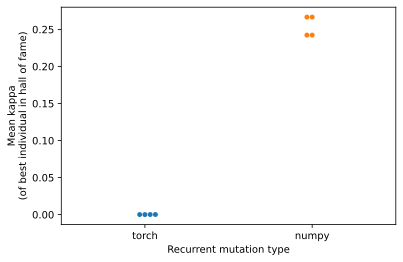

In [11]:
sns.swarmplot(x='implementation', y="MAX:kappa.mean", data=df)
plt.xlabel('Recurrent mutation type')
plt.ylabel('Mean kappa\n(of best individual in hall of fame)')
#plt.ylim([0,1])
plt.show()